In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl

In [5]:
#in this data set there is an encoding eroor so use this encoding="iso-8859-1" while reading the csv file
data=pd.read_csv('8-Forest-Fire-in-brazil.csv',encoding="iso-8859-1")
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [6]:
data.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

In [8]:
#as you can see that in our dataset the date column is in object data which is not useful if we want to work with this dataset
#as we will require in date time format, so we need to change the value as shown below
#to change the data type we are parsing the date column as shown below

In [13]:
data1=pd.read_csv('8-Forest-Fire-in-brazil.csv',encoding="iso-8859-1",parse_dates=['date'])
data1.dtypes
#as you can see that the data type for the date column had been changed

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

# 1. Display  Top 5 Rows of the Dataset

In [14]:
data1.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


# 2. Display Bottom 5 Rows of the Dataset

In [15]:
data1.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


# 3. Find the shape of our dataset (Number of rows & columns)

In [16]:
data1.shape

(6454, 5)

In [21]:
print("Number of rows",data1.shape[0])

Number of rows 6454


In [22]:
print("Number of columns",data1.shape[1])

Number of columns 5


# 4. Getting Information about our dataset like total number of rows, total number of columns, datatypes of each column & memory requirement

In [31]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


# 5. Check for Duplicate Data & drop them

In [32]:
dup_data=data1.duplicated().any()

In [33]:
print(dup_data)

True


In [34]:
data1=data1.drop_duplicates()

In [36]:
data1.shape

(6422, 5)

# 6. Check Null values in the dataset

In [38]:
data1.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

# 7. Get overall stastics about the dataframe

In [40]:
data1.describe()

,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


# 8.Rename Month Names to English

In [41]:
data1.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [42]:
data1.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [43]:
#as you can see that the month column has names in portugese langugae, so we need to convert them in english lanugage

In [46]:
data1['month_new']=data1['month'].map({'Janeiro': 'jan',
'Fevereiro': 'feb', 
'Março': 'march',
'Abril':'april', 
'Maio': 'may',
'Junho': 'jun',
'Julho': 'july',
'Agosto': 'august',
'Setembro': 'sep',
'Outubro':'oct',
'Novembro': 'nov', 'Dezembro': 'dec'})

In [47]:
data1.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan


In [48]:
#as you can see that a new column with month name in english langugae had appeared

# 9. Total numbers of fire registered

In [51]:
print("total fires reported",data1.shape[0])

total fires reported 6422


# 10. In Which month maximum number of forest fires were reported ?

In [53]:
data1.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [54]:
data1.groupby('month_new')['number'].sum()

month_new
april     28184.770
august    88050.435
dec       57535.480
feb       30839.050
jan       47681.844
july      92319.113
jun       55997.675
march     30709.405
may       34725.363
nov       85508.054
oct       88681.579
sep       58578.305
Name: number, dtype: float64

In [55]:
#we are storing the dataset into another variable & visualizing it alongside resetting the index

In [56]:
data2=data1.groupby('month_new')['number'].sum().reset_index()
data2

,month_new,number
0,april,28184.770
1,august,88050.435
2,dec,57535.480
3,feb,30839.050
4,jan,47681.844
5,july,92319.113
6,jun,55997.675
7,march,30709.405
8,may,34725.363
9,nov,85508.054


<Axes: xlabel='month_new', ylabel='number'>

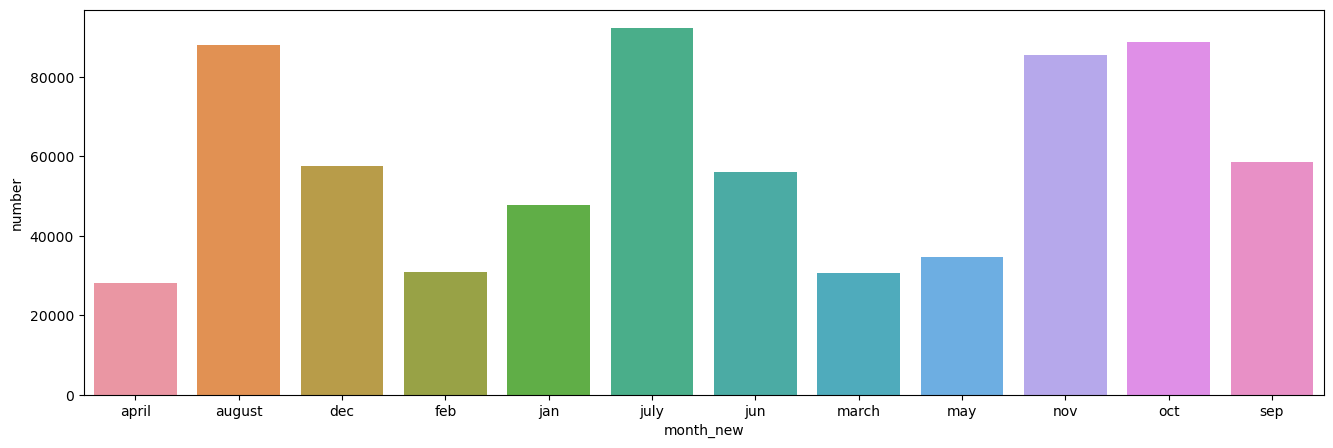

In [60]:
pl.figure(figsize=(16,5))
sns.barplot(x="month_new",y="number",data=data2)

# 11. In which year maximum number of forest fires were reported ?

In [61]:
data2=data1.groupby('year')['number'].sum().reset_index()
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<Axes: xlabel='year', ylabel='number'>

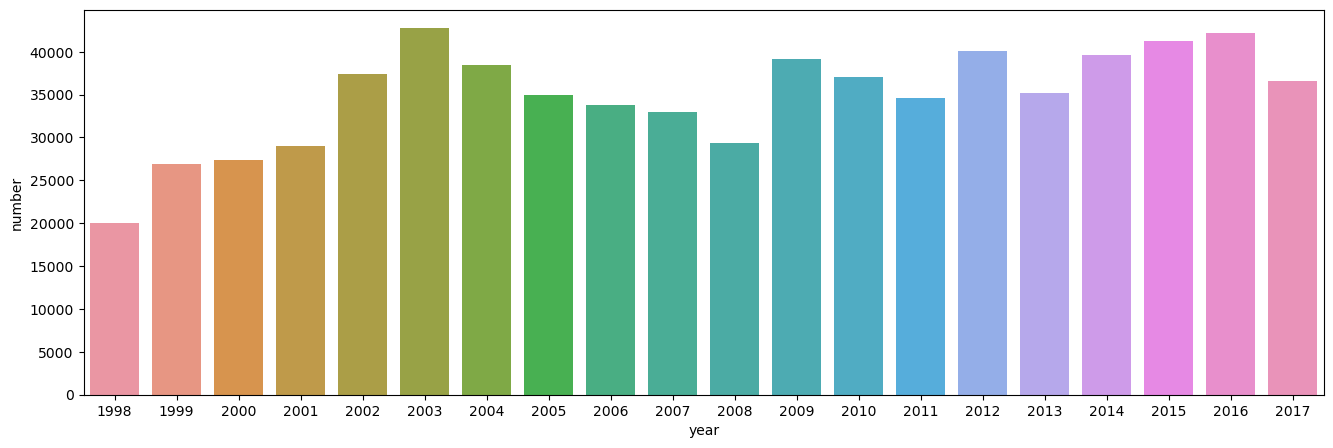

In [62]:
pl.figure(figsize=(16,5))
sns.barplot(x="year",y="number",data=data2)

# 12. In which state maximum number of forest fires were reported ?

In [63]:
data2=data1.groupby('state')['number'].sum().reset_index()
data2

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


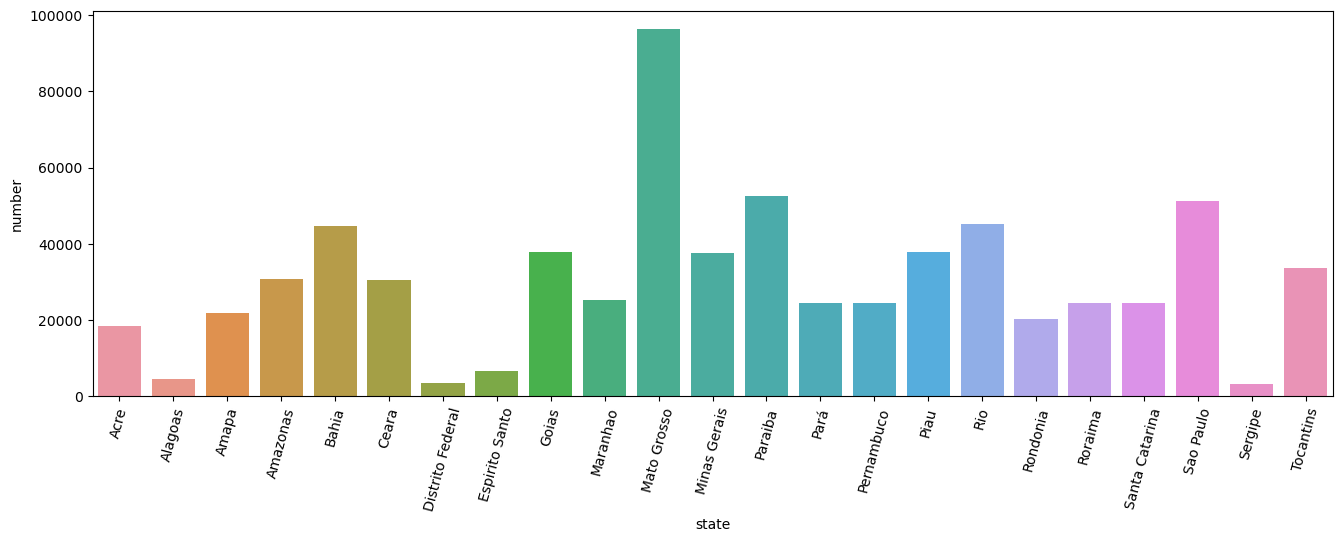

In [67]:
pl.figure(figsize=(16,5))
sns.barplot(x="state",y="number",data=data2)
pl.xticks(rotation=75)
pl.show()

# 13. Find total number of fires were reported in amazonas

In [68]:
data1.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [79]:
data1[data1['state']=='Amazonas']

,year,state,month,number,date,month_new
0,1998,Amazonas,Janeiro,0.0,1998-01-01,jan
1,1999,Amazonas,Janeiro,0.0,1999-01-01,jan
2,2000,Amazonas,Janeiro,0.0,2000-01-01,jan
3,2001,Amazonas,Janeiro,0.0,2001-01-01,jan
4,2002,Amazonas,Janeiro,0.0,2002-01-01,jan
...,...,...,...,...,...,...
6449,2012,Amazonas,Dezembro,128.0,2012-01-01,dec
6450,2013,Amazonas,Dezembro,85.0,2013-01-01,dec
6451,2014,Amazonas,Dezembro,223.0,2014-01-01,dec
6452,2015,Amazonas,Dezembro,373.0,2015-01-01,dec


In [78]:
data1[data1['state']=='Amazonas']['number'].sum()

698811.073

# 14. Display numbers of fires were reported in amazonas (Year-wise)

In [85]:
data4=data1[data1['state']=='Amazonas']
data5=data4.groupby('year')['number'].sum()
data5

year
1998    20013.971
1999    26882.821
2000    27351.251
2001    29054.612
2002    37390.600
2003    42760.674
2004    38450.163
2005    35004.965
2006    33824.161
2007    33028.413
2008    29378.964
2009    39116.178
2010    37037.449
2011    34633.545
2012    40084.860
2013    35137.118
2014    39621.183
2015    41208.292
2016    42212.229
2017    36619.624
Name: number, dtype: float64

In [86]:
data5=data4.groupby('year')['number'].sum().reset_index()
data5

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<Axes: xlabel='year', ylabel='number'>

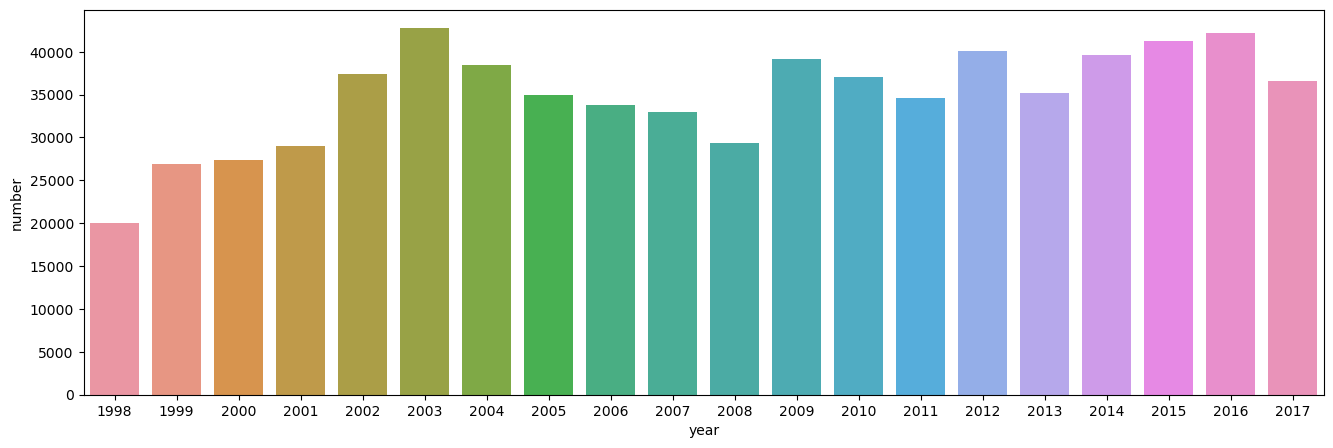

In [87]:
pl.figure(figsize=(16,5))
sns.barplot(x="year",y="number",data=data5)

# 15.Display numbers of fires were reported in amazonas (Day-wise)

In [88]:
data1.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [89]:
data6=data1[data1['state']=="Amazonas"]

In [94]:
data6.groupby(data6['date'].dt.dayofweek).sum().number
# as you can see that number of weeknames has been displayed but we want to show name for the week names

C:\Users\fv3\AppData\Local\Temp\ipykernel_13256\1585841045.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data6.groupby(data6['date'].dt.dayofweek).sum().number


date
0     62083.025
1    101906.682
2     82381.857
3    138788.604
4    106132.499
5     96989.761
6    110528.645
Name: number, dtype: float64

In [93]:
import calendar
day=[calendar.day_name[x] for x in range(0,7)]
day

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [100]:
day=data6.groupby(data6['date'].dt.dayofweek).sum().number
day.index=[calendar.day_name[x] for x in range(0,7)]
day


C:\Users\fv3\AppData\Local\Temp\ipykernel_13256\252427981.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day=data6.groupby(data6['date'].dt.dayofweek).sum().number


Monday        62083.025
Tuesday      101906.682
Wednesday     82381.857
Thursday     138788.604
Friday       106132.499
Saturday      96989.761
Sunday       110528.645
Name: number, dtype: float64

In [101]:
day=day.reset_index()
day

,index,number
0,Monday,62083.025
1,Tuesday,101906.682
2,Wednesday,82381.857
3,Thursday,138788.604
4,Friday,106132.499
5,Saturday,96989.761
6,Sunday,110528.645


<Axes: xlabel='index', ylabel='number'>

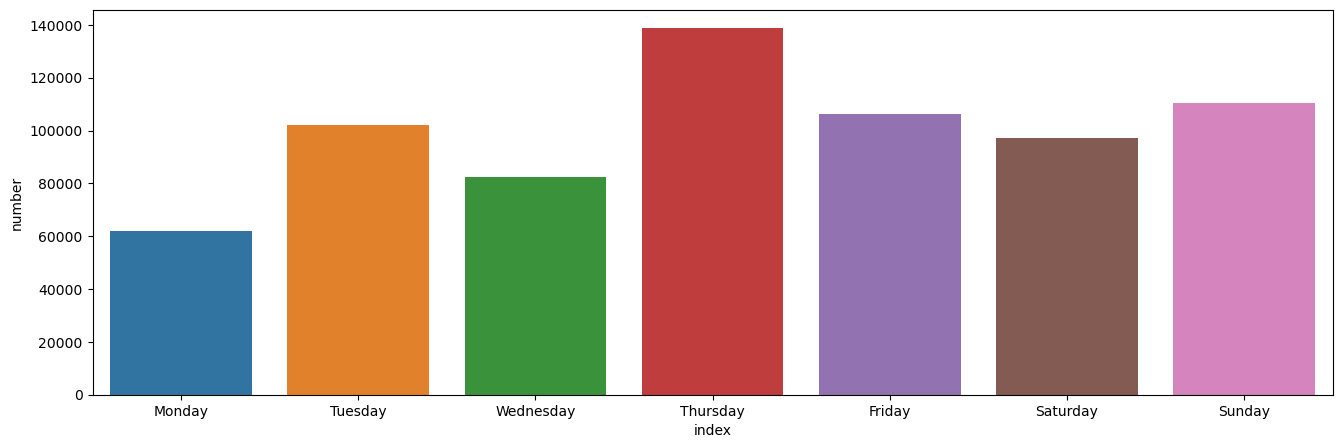

In [102]:
pl.figure(figsize=(16,5))
sns.barplot(x="index",y="number",data=day)

# 16. Find total number of fires were reported in 2015 & visualize data based on each month

In [103]:
data1.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [106]:
data1[data1['year']==2015]

,year,state,month,number,date,month_new
17,2015,Amazonas,Janeiro,1.000,2015-01-01,jan
37,2015,Amazonas,Fevereiro,2.000,2015-01-01,feb
57,2015,Amazonas,Março,2.000,2015-01-01,march
77,2015,Amazonas,Abril,3.000,2015-01-01,april
97,2015,Amazonas,Maio,2.000,2015-01-01,may
...,...,...,...,...,...,...
6372,2015,Amazonas,Agosto,2.540,2015-01-01,august
6392,2015,Amazonas,Setembro,5.510,2015-01-01,sep
6412,2015,Amazonas,Outubro,4.844,2015-01-01,oct
6432,2015,Amazonas,Novembro,833.000,2015-01-01,nov


In [109]:
data1[data1['year']==2015].groupby('month_new')['number'].sum()

month_new
april     2573.000
august    4363.125
dec       4088.522
feb       2309.000
jan       4635.000
july      4364.392
jun       3260.552
march     2202.000
may       2384.000
nov       4034.518
oct       4499.525
sep       2494.658
Name: number, dtype: float64

In [113]:
fire=data1[data1['year']==2015].groupby('month_new')['number'].sum().reset_index()
fire

,month_new,number
0,april,2573.000
1,august,4363.125
2,dec,4088.522
3,feb,2309.000
4,jan,4635.000
5,july,4364.392
6,jun,3260.552
7,march,2202.000
8,may,2384.000
9,nov,4034.518


<Axes: xlabel='month_new', ylabel='number'>

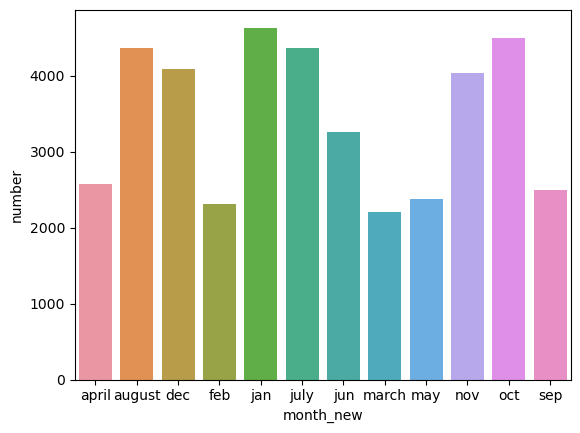

In [114]:
sns.barplot(x="month_new",y="number",data=fire)

# 17. Find the average number of fires were reported from highest to lowest (state-wise)

In [115]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [121]:
data8=data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
data8

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,201.351523
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,109.698573


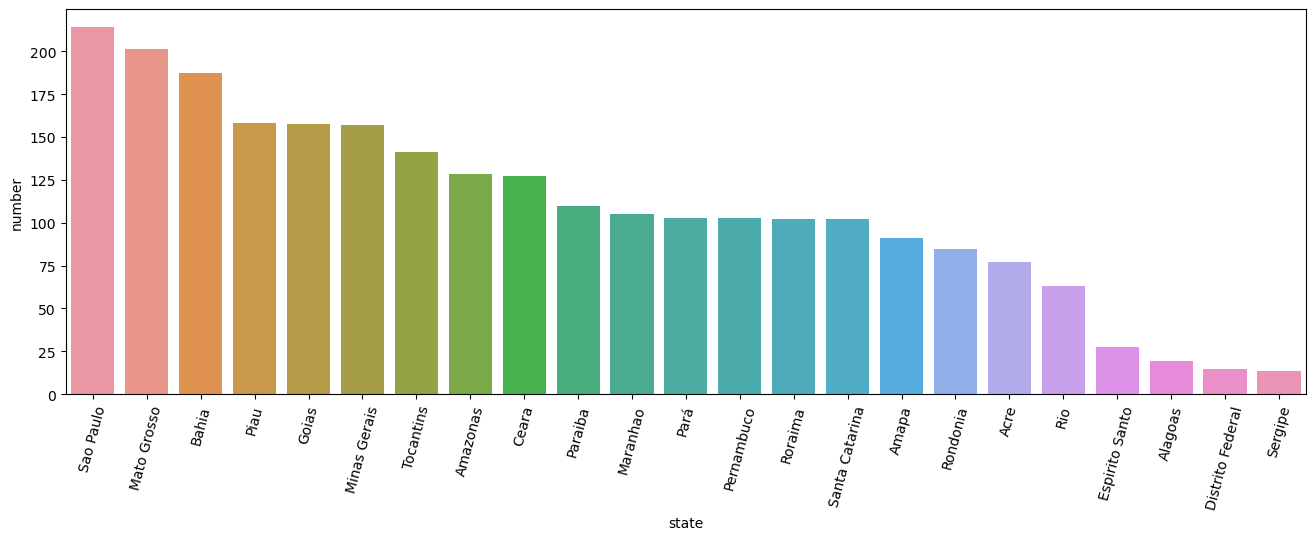

In [124]:
pl.figure(figsize=(16,5))
sns.barplot(x="state",y="number",data=data8)
pl.xticks(rotation=75)
pl.show()